### Analyze data from Survey monkey about " does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?"
### Eric Tsai (yytsai1002@gmail.com)
### Oct 2018

### Read in data

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

star_wars = pd.read_csv("../data/star_wars.csv", encoding="ISO-8859-1")

star_wars.info()
star_wars.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Remove any rows where RespondentID is NaN.

In [143]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

### Inspecting columns

In [144]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### Cleaning and Mapping Checkbox Columns

### series = series.map( )  

column 1 & 2



In [145]:
#using function map() to mapping columns:  series = series.map()

#star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts()
#star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts()

yes_no = {"Yes": True, "No": False}

for col in star_wars.columns[1:3]:
    star_wars[col] = star_wars[col].map(yes_no)

#star_wars.head()


column 3~8

In [146]:
checkbox_col = movie_mapping = {
                                "Star Wars: Episode I  The Phantom Menace": True,  
                                "Star Wars: Episode II  Attack of the Clones": True,
                                "Star Wars: Episode III  Revenge of the Sith": True,
                                "Star Wars: Episode IV  A New Hope": True,
                                "Star Wars: Episode V The Empire Strikes Back": True,
                                "Star Wars: Episode VI Return of the Jedi": True,
                                 np.nan: False,
                               }

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(checkbox_col)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Renamming columns:  

### pd.rename( columns = )

In [147]:
rename_col = {
             "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
             "Unnamed: 4":  "seen_2", 
             "Unnamed: 5" : "seen_3",
             "Unnamed: 6" : "seen_4",
             "Unnamed: 7" : "seen_5",
             "Unnamed: 8" : "seen_6"
             }

star_wars = star_wars.rename(columns = rename_col)
star_wars.head()
    
    


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Cleaning rank columns

In [148]:
# convert rank column to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# rename rank columns
rename_rank_col = {
             "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
             "Unnamed: 10":  "ranking_2", 
             "Unnamed: 11" : "ranking_3",
             "Unnamed: 12" : "ranking_4",
             "Unnamed: 13" : "ranking_5",
             "Unnamed: 14" : "ranking_6"
             }

star_wars = star_wars.rename(columns = rename_rank_col)

star_wars.head()
    
    

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Calculate rank mean and plot bar chart to find the highest rank movie

<Container object of 6 artists>

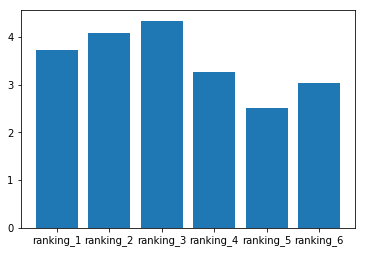

In [149]:
# calculate mean
rank_mean = star_wars[star_wars.columns[3:9]].mean()

%matplotlib inline

col = ["ranking_1","ranking_2","ranking_3","ranking_4","ranking_5","ranking_6"]
plt.bar(col, star_wars[star_wars.columns[9:15]].mean()) # can also use "range(6) for x-axis"

### Findings:

Original series are ranked higher than new series

### Find the most viewed movie

<Container object of 6 artists>

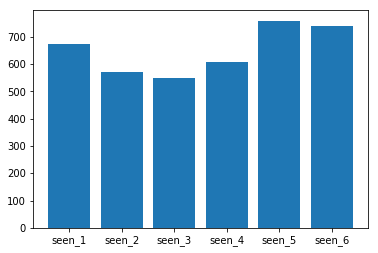

In [150]:
# calculate mean
view_count = star_wars[star_wars.columns[3:9]].sum()


col = ["seen_1","seen_2","seen_3","seen_4","seen_5","seen_6"]
plt.bar(col, star_wars[star_wars.columns[3:9]].sum())

### Findings:  

Original movies were seen by more respondents than the newer movies. 

### View count and rank with different gender

<Container object of 6 artists>

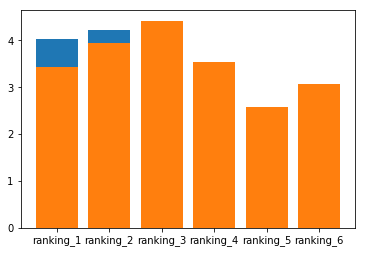

In [161]:
male   = star_wars[star_wars["Gender"]=="Male"]
female = star_wars[star_wars["Gender"]=="Female"]


col = ["ranking_1","ranking_2","ranking_3","ranking_4","ranking_5","ranking_6"]
plt.bar(col, male[male.columns[9:15]].mean())
plt.bar(col, female[female.columns[9:15]].mean())

<Container object of 6 artists>

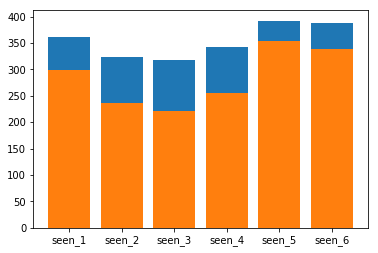

In [160]:
col = ["seen_1","seen_2","seen_3","seen_4","seen_5","seen_6"]
plt.bar(col, male[male.columns[3:9]].sum())
plt.bar(col, female[female.columns[3:9]].sum())

### More to do:  


1. Segment the data based on columns like Education, Location (Census Region), and Which character shot first?
2. Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
3. Which character do respondents like the most?
4. Which character do respondents dislike the most?
5. Which character is the most controversial (split between likes and dislikes)?